In [9]:
import pandas as pd
import sys
sys.path.append('./ex_fuzzy/')
sys.path.append('../ex_fuzzy/')

from sklearn import datasets
from sklearn.model_selection import train_test_split

import ex_fuzzy.fuzzy_sets as fs
import ex_fuzzy.evolutionary_fit as GA
import ex_fuzzy.utils as  utils
import ex_fuzzy.eval_tools as eval_tools

In [16]:
# Choose the parameters for the genetic algorithm
n_gen = 50
n_pop = 30

# Max number of rules and max number of antecedents per rule
nRules = 15
nAnts = 4

# Number of linguistic variables to use in the fuzzy variables
vl = 3

# Tolerance for the dominance score for each rule
tolerance = 0.01

# Type of dataset used
fz_type_studied = fs.FUZZY_SETS.gt2 # Also t2, gt2

In [11]:
# Load the iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [12]:
# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [13]:
# Compute the linguistic vatiables
precomputed_partitions = utils.construct_partitions(X, fz_type_studied)

# Create and fit the FRB classifier using a genetic algorithm
fl_classifier = GA.BaseFuzzyRulesClassifier(nRules=nRules, linguistic_variables=precomputed_partitions, nAnts=nAnts, 
                                            n_linguistic_variables=vl, fuzzy_type=fz_type_studied, verbose=False, tolerance=tolerance)
fl_classifier.fit(X_train, y_train, n_gen=n_gen, pop_size=n_pop)

------------
ACCURACY
Train performance: 0.84
Test performance: 0.74
------------
MATTHEW CORRCOEF
Train performance: 0.7814353363244656
Test performance: 0.6790830119639542
------------


c:\Users\javi-\OneDrive\Documentos\GitHub\exFuzzy\Demos\../ex_fuzzy\ex_fuzzy\vis_rules.py:268: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


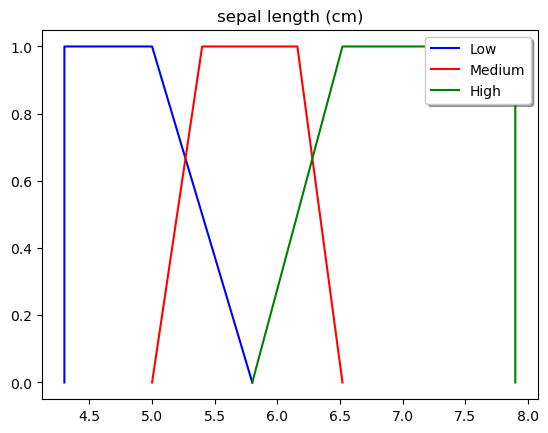

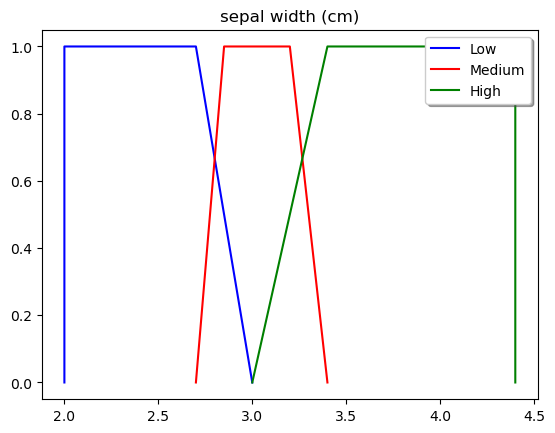

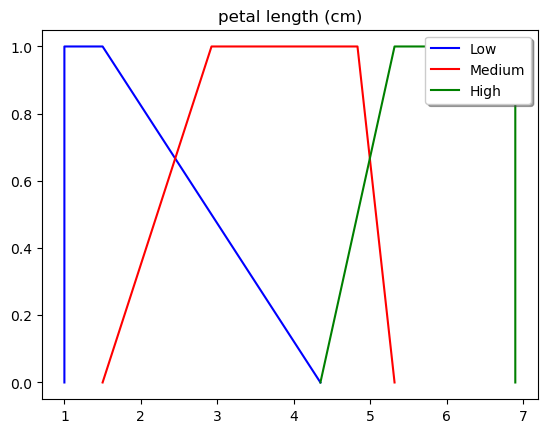

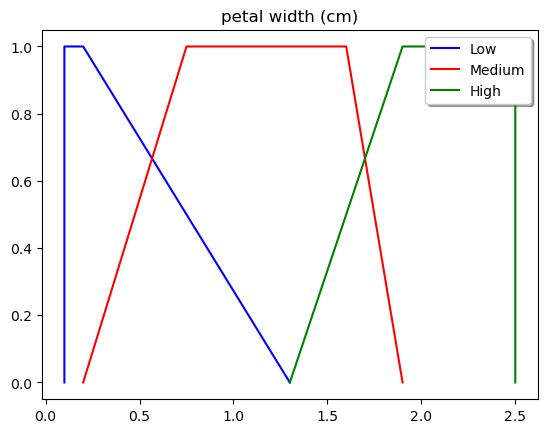

In [15]:
# Display the classifier performance and visualize the results
eval_tools.eval_fuzzy_model(fl_classifier, X_train, y_train, X_test, y_test, 
                        plot_rules=False, print_rules=False, plot_partitions=True)